# Notes

For a Python library that does inertial measurement unit (IMU) calculations, see https://github.com/micropython-IMU/micropython-fusion

For notes on pitch, roll, and yaw movements, see http://planning.cs.uiuc.edu/node102.html


,alt,pitch_a,roll_a,yaw_a,pitch_r,roll_r,yaw_r
time,,,,,,,
0.175781,162.711,-1.804190,9.97568,-0.208176,-0.055557,0.117323,-0.033132
0.237305,162.796,0.497707,10.00920,0.131605,0.004614,-0.068380,-0.129649
0.294922,162.722,-0.897309,9.75554,1.672580,-0.090070,-0.035699,-0.071006
0.452148,162.532,-0.605384,9.80100,-1.325620,-0.058305,-0.165507,0.008712
0.509766,162.479,-0.397209,9.38704,0.294317,0.038517,-0.080903,-0.030689


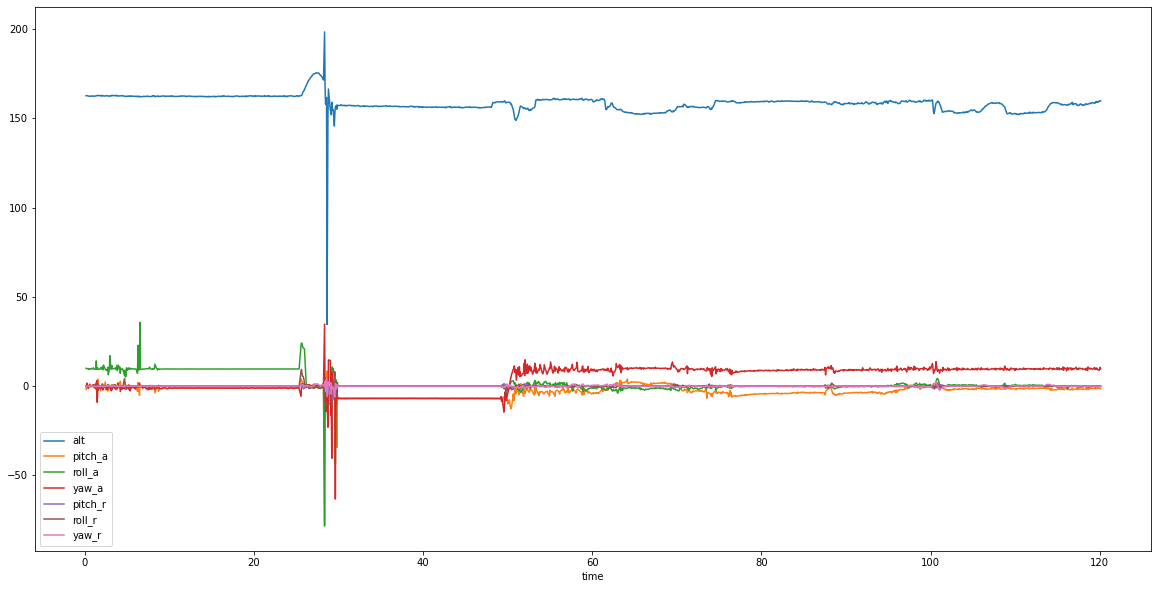

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_file_name = 'motion.csv' # default filename output from rocket script
#data_file_name = 'deck.csv' # change to deck.csv to look at a test data set of throwing a rocket off of a deck
flight_data_raw = pd.read_csv(data_file_name)
flight_data_raw.columns = ['time', 'alt', 'pitch_a', 'roll_a', 'yaw_a', 'pitch_r', 'roll_r', 'yaw_r']
flight_data_raw.set_index('time', inplace=True)

flight_data_raw.plot(figsize=(20,10))
flight_data_raw.head()

In [116]:
# Relevant time interval for a test of throwing rocket off of deck (the deck.csv file)
start_time = 25
end_time = 30.5
ground_elevation = 161

flight_data = flight_data_raw.loc[(flight_data_raw.index>start_time) & (flight_data_raw.index<end_time)].copy()
flight_data

,alt,pitch_a,roll_a,yaw_a,pitch_r,roll_r,yaw_r
time,,,,,,,
25.0664,162.743,-1.019340,9.623930,-0.873380,-0.022264,0.020806,-0.027329
25.1250,162.680,-1.184450,9.626330,-0.844667,0.003697,0.022639,-0.032521
25.1826,162.415,-1.107880,9.595220,-0.847059,0.022023,0.006757,-0.021220
25.2402,162.479,-0.981057,9.571290,-0.818345,0.034852,-0.003017,-0.011752
25.2979,162.648,-1.071980,9.602400,-0.954736,0.031186,0.007367,-0.000451
...,...,...,...,...,...,...,...
30.2627,157.596,-6.625730,-0.122034,-6.984650,0.008279,0.009200,-0.015417
30.3223,157.649,-6.618550,-0.136391,-7.042080,0.004919,0.006146,-0.017555
30.3809,157.511,-6.613760,-0.110070,-6.987040,0.003087,0.015919,-0.011141


Text(0, 0.5, 'altitude (m)')

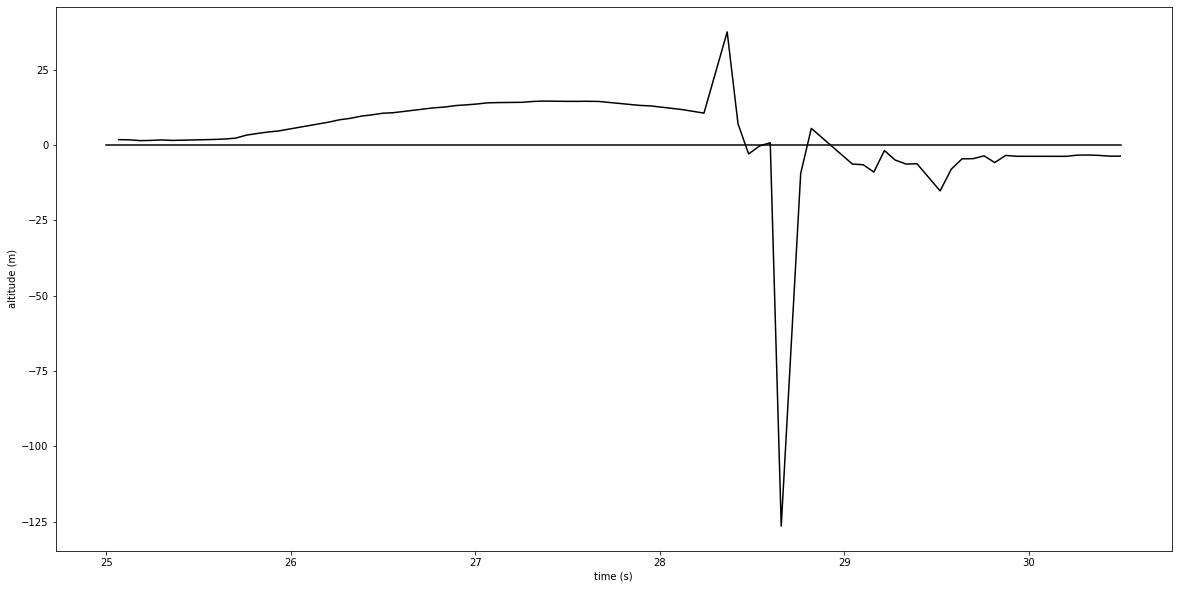

In [117]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(flight_data.index, flight_data.alt - ground_elevation, color='k')
ax.plot([start_time, end_time], [0, 0], color='k')
ax.set_xlabel('time (s)')
ax.set_ylabel('altitude (m)')



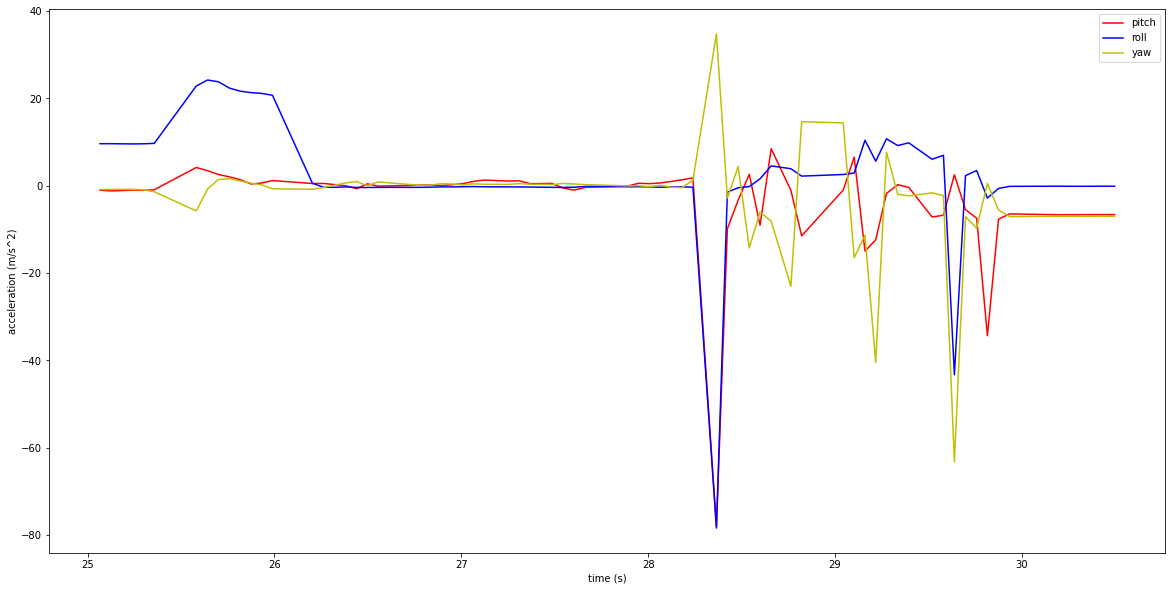

In [118]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(flight_data.index, flight_data.pitch_a, color='r', label='pitch')
ax.plot(flight_data.index, flight_data.roll_a, color='b', label='roll')
ax.plot(flight_data.index, flight_data.yaw_a, color='y', label='yaw')
ax.set_xlabel('time (s)')
ax.set_ylabel('acceleration (m/s^2)')
ax.legend(loc='best')


Text(0, 0.5, 'actual upward acceleration (m/s^2)')

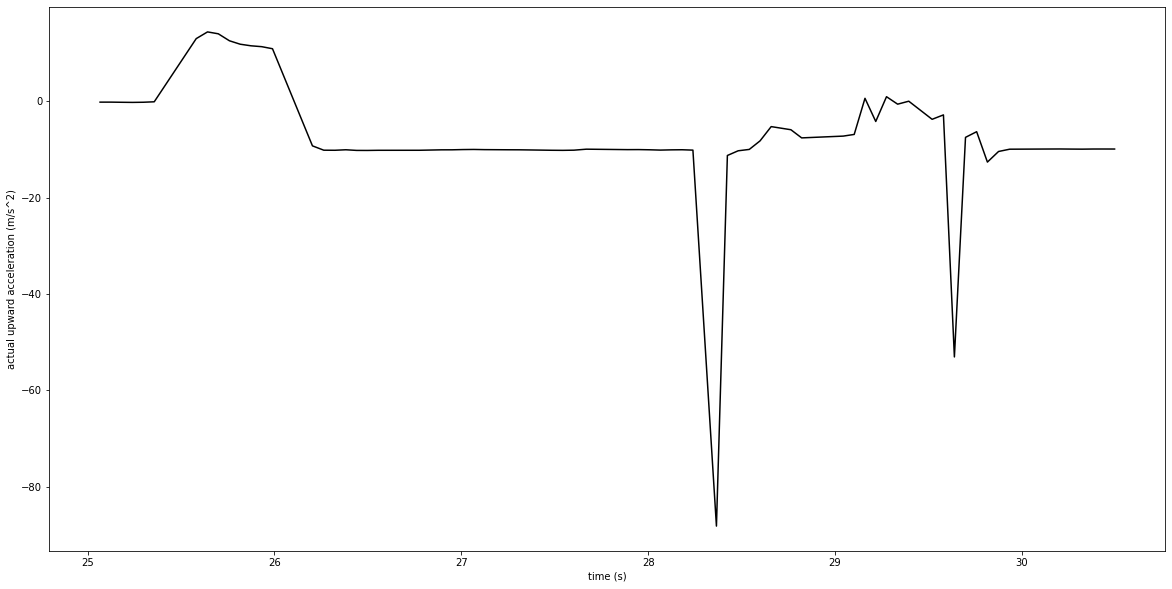

In [119]:
# Estimate the acceleration in the direction of the rocket nose cone.
# Assumes the rocket is pointing up.
g = 9.8
engine_accel = flight_data.roll_a - g

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(flight_data.index, engine_accel, color='k')
ax.set_xlabel('time (s)')
ax.set_ylabel('actual upward acceleration (m/s^2)')


Text(0, 0.5, 'net acceleration (m/s^2)')

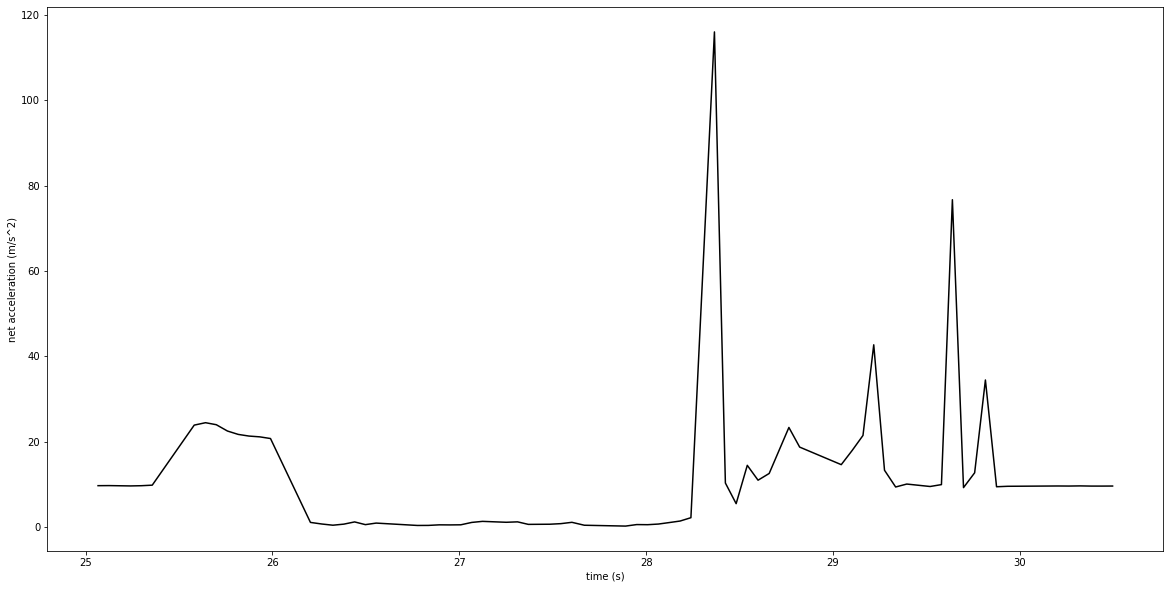

In [120]:
# Calculate net acceleration, i.e. the vector sum of acceleration in any direction.
# This value should be zero when in free-fall.
net_accel = np.sqrt(flight_data.pitch_a**2 + flight_data.roll_a**2 + flight_data.yaw_a**2)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(flight_data.index, net_accel, color='k')
ax.set_xlabel('time (s)')
ax.set_ylabel('net acceleration (m/s^2)')


Text(0.5, 0, 'time (s)')

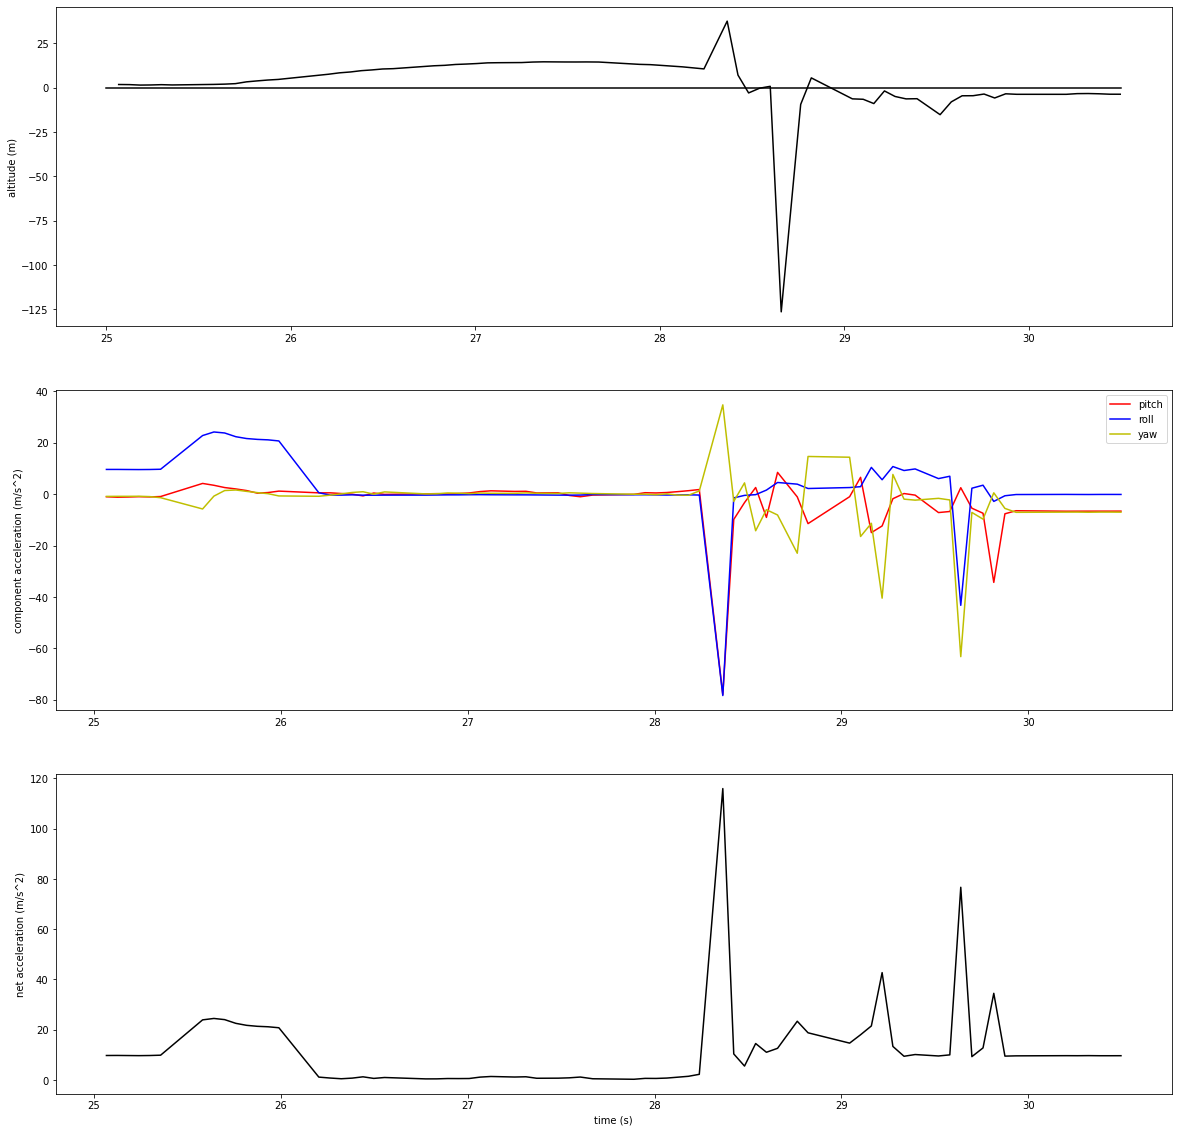

In [121]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(flight_data.index, flight_data.alt - ground_elevation, color='k')
ax1.plot([start_time, end_time], [0, 0], color='k')
ax1.set_ylabel('altitude (m)')

ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(flight_data.index, flight_data.pitch_a, color='r', label='pitch')
ax2.plot(flight_data.index, flight_data.roll_a, color='b', label='roll')
ax2.plot(flight_data.index, flight_data.yaw_a, color='y', label='yaw')
ax2.set_ylabel('component acceleration (m/s^2)')
ax2.legend(loc='best')

ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(flight_data.index, net_accel, color='k')
ax3.set_ylabel('net acceleration (m/s^2)')
ax3.set_xlabel('time (s)')


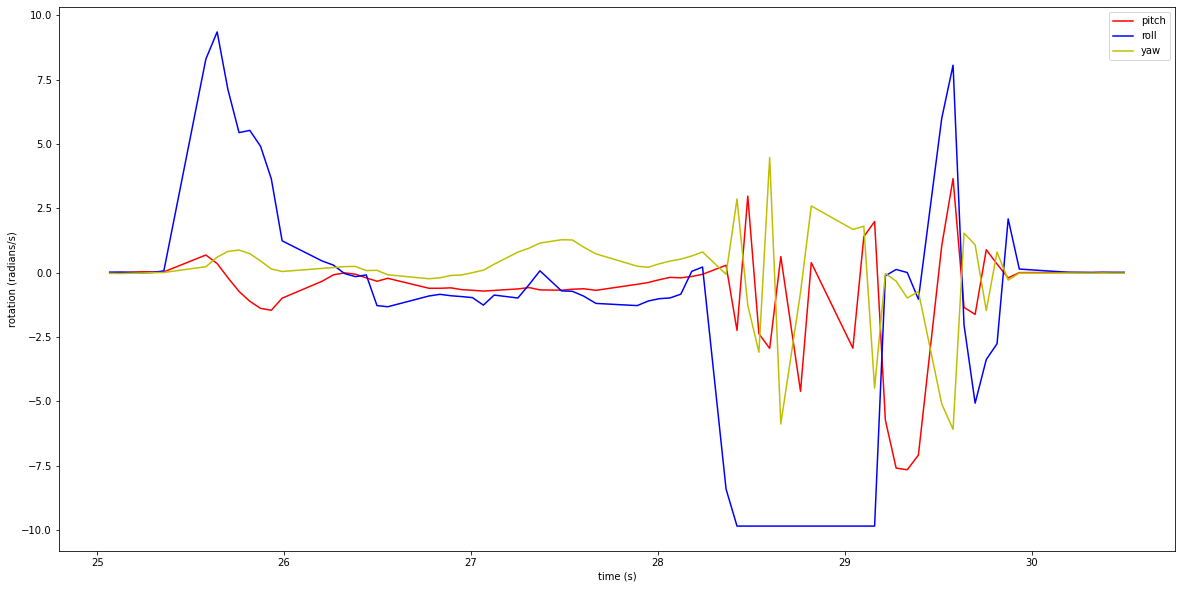

In [127]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(flight_data.index, flight_data.pitch_r, color='r', label='pitch')
ax.plot(flight_data.index, flight_data.roll_r, color='b', label='roll')
ax.plot(flight_data.index, flight_data.yaw_r, color='y', label='yaw')
ax.set_xlabel('time (s)')
ax.set_ylabel('rotation (radians/s)')
ax.legend(loc='best')


Text(0, 0.5, 'pitch/yaw rotation (radians/s)')

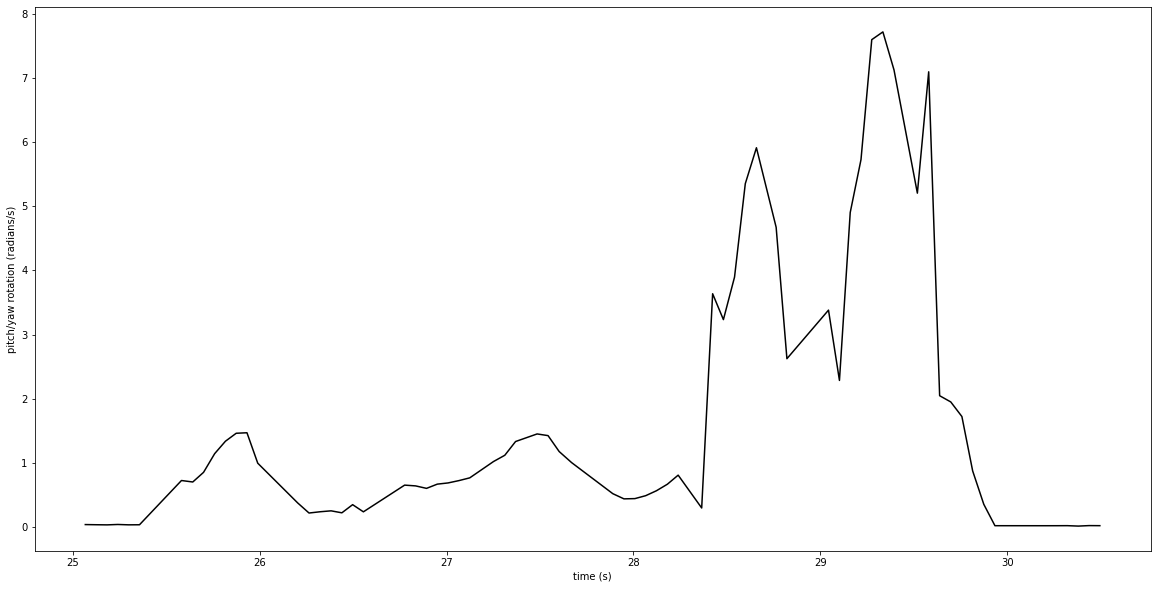

In [126]:
# Calculate pitch/yaw rotation, i.e. the vector sum of patch and yaw rotations, given the rotation in the
# plane perpendicular to the roll axis. You can think of this as the rate of tumbling
pitch_yaw = np.sqrt(flight_data.pitch_r**2 + flight_data.yaw_r**2)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(flight_data.index, pitch_yaw, color='k')
ax.set_xlabel('time (s)')
ax.set_ylabel('pitch/yaw rotation (radians/s)')


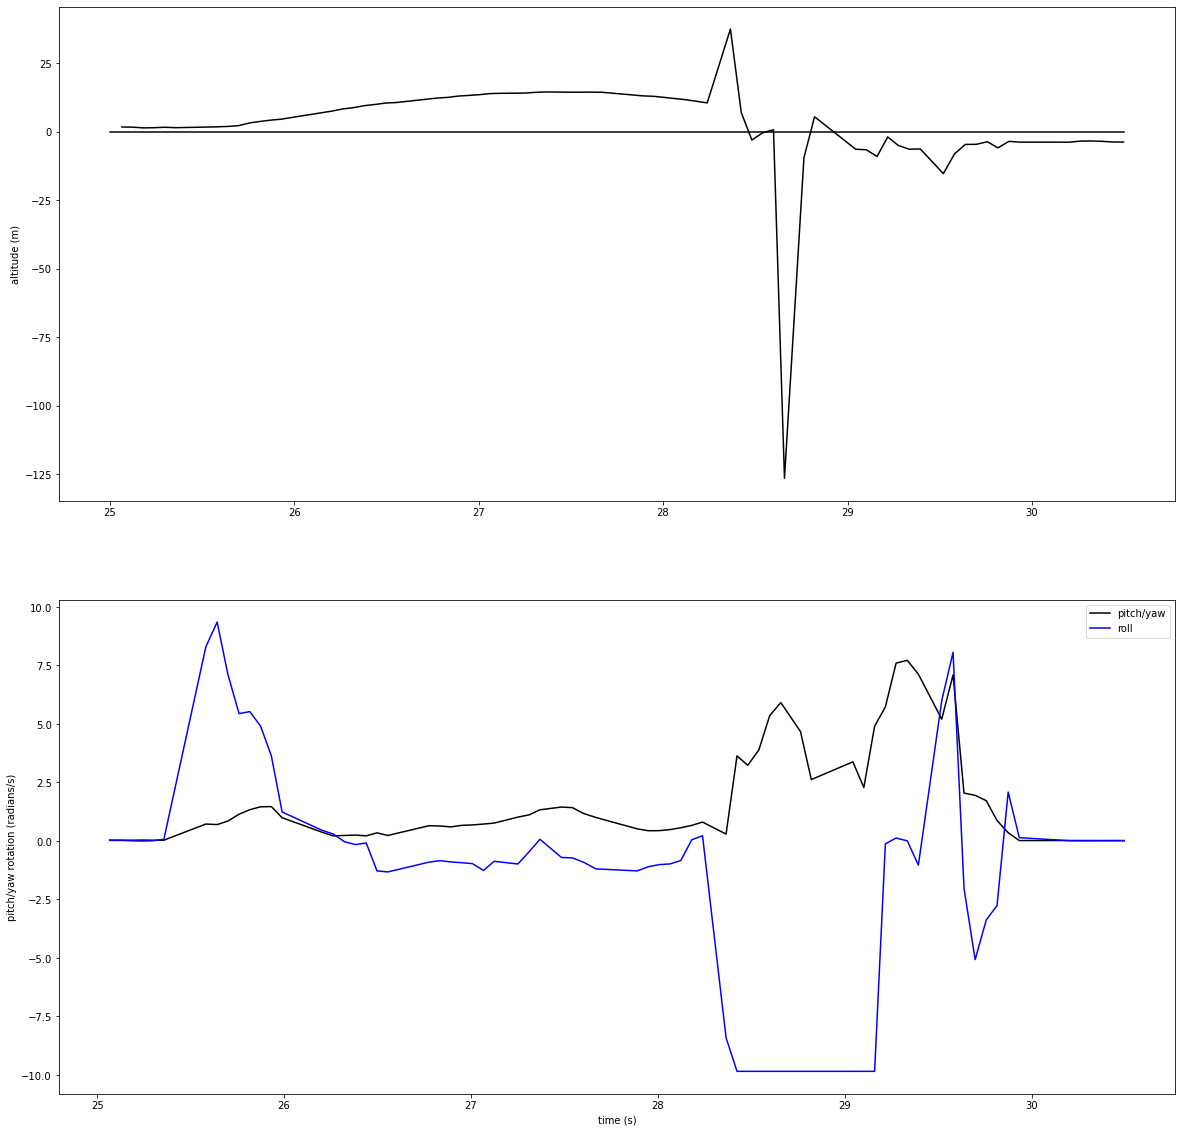

In [131]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(flight_data.index, flight_data.alt - ground_elevation, color='k')
ax1.plot([start_time, end_time], [0, 0], color='k')
ax1.set_ylabel('altitude (m)')

ax = fig.add_subplot(2, 1, 2)
ax.plot(flight_data.index, pitch_yaw, color='k', label = 'pitch/yaw')
ax.plot(flight_data.index, flight_data.roll_r, color='b', label='roll')
ax.set_xlabel('time (s)')
ax.set_ylabel('pitch/yaw rotation (radians/s)')
ax.legend(loc='best')

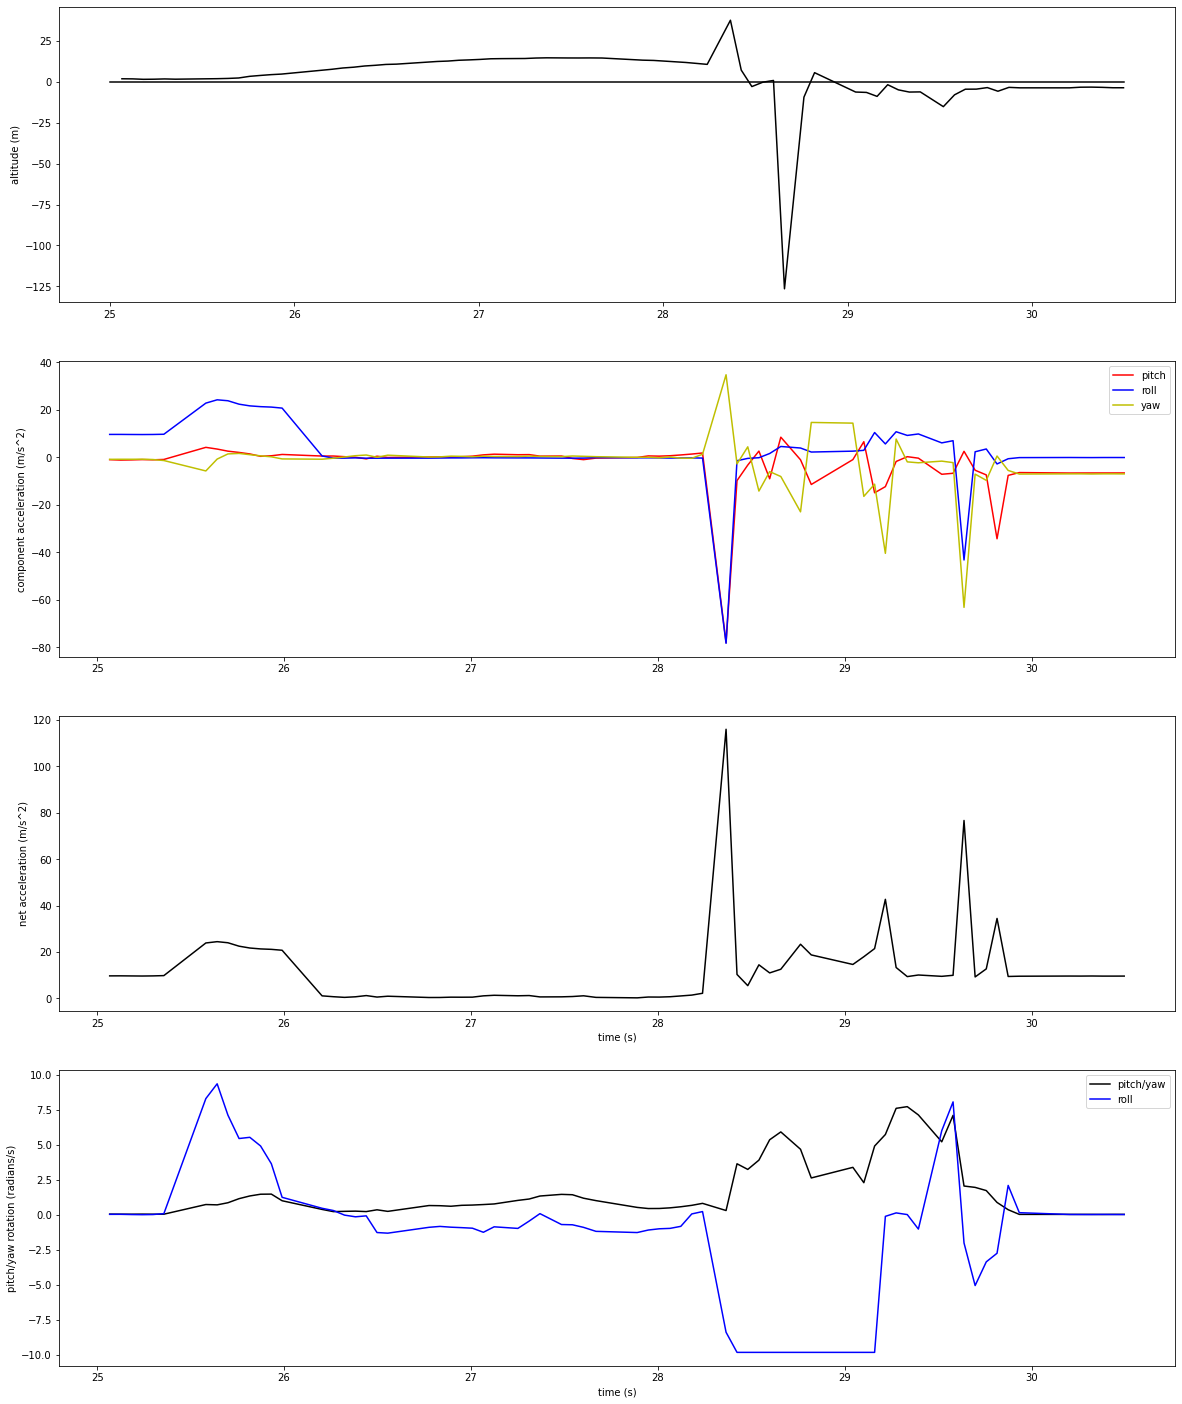

In [132]:
fig = plt.figure(figsize=(20,25))
ax1 = fig.add_subplot(4, 1, 1)
ax1.plot(flight_data.index, flight_data.alt - ground_elevation, color='k')
ax1.plot([start_time, end_time], [0, 0], color='k')
ax1.set_ylabel('altitude (m)')

ax2 = fig.add_subplot(4, 1, 2)
ax2.plot(flight_data.index, flight_data.pitch_a, color='r', label='pitch')
ax2.plot(flight_data.index, flight_data.roll_a, color='b', label='roll')
ax2.plot(flight_data.index, flight_data.yaw_a, color='y', label='yaw')
ax2.set_ylabel('component acceleration (m/s^2)')
ax2.legend(loc='best')

ax = fig.add_subplot(4, 1, 3)
ax.plot(flight_data.index, net_accel, color='k')
ax.set_xlabel('time (s)')
ax.set_ylabel('net acceleration (m/s^2)')

ax3 = fig.add_subplot(4, 1, 4)
ax3.plot(flight_data.index, pitch_yaw, color='k', label = 'pitch/yaw')
ax3.plot(flight_data.index, flight_data.roll_r, color='b', label='roll')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('pitch/yaw rotation (radians/s)')
ax3.legend(loc='best')
